In [1]:
import geopandas as gpd
import geoplot
import matplotlib.pyplot as plt
import pystac

from stac_df import pystac_catalog_to_dataframe
from coregister import coregister_raster

In [3]:
# Load S1 chips catalog
sar_catalog = pystac.Catalog.from_file("./data/usfimr-sar-catalog/catalog.json")
sar_df = pystac_catalog_to_dataframe(sar_catalog)

<AxesSubplot:>

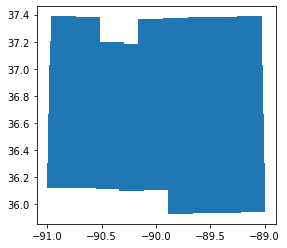

In [5]:
sar_df.plot()

In [6]:
hand_catalog = pystac.Collection.from_file("./data/hand-catalog/collection.json")
hand_df = pystac_catalog_to_dataframe(hand_catalog)

<AxesSubplot:>

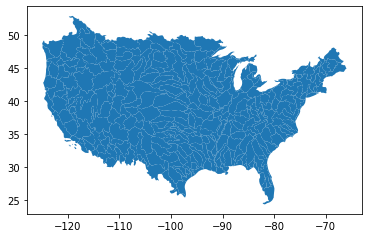

In [8]:
hand_df.plot()

In [9]:
hand_sar_df = gpd.sjoin(hand_df, sar_df, op="intersects", how="inner")

<AxesSubplot:>

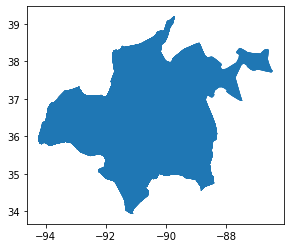

In [10]:
hand_sar_df.plot()

In [11]:
sar_hand_df = gpd.sjoin(sar_df, hand_df, op="intersects", how="inner", lsuffix="sar", rsuffix="hand")

In [13]:
sar_hand_df.head()

,type_sar,stac_version_sar,id_sar,properties_sar,geometry,bbox_sar,links_sar,assets_sar,collection_sar,index_hand,type_hand,stac_version_hand,id_hand,properties_hand,bbox_hand,links_hand,assets_hand,collection_hand
16SBE_2_0,Feature,0.9.0,16SBE_2_0,{'datetime': '2017-05-04T12:03:43Z'},"POLYGON ((-89.88777 35.92968, -89.65933 35.929...","[35.92967653652041, -89.88777486023257, 36.115...","[{'rel': 'collection', 'href': '../../1/collec...",{'MASK': {'href': 's3://glofimr-sar-4326/1/654...,1,080102,Feature,0.9.0,080102,{'datetime': '2020-06-01T00:00:00Z'},"[-90.26463817241495, 34.54691906095957, -88.30...","[{'rel': 'collection', 'href': '../collection....",{'hand': {'href': 'https://hand-data.s3.amazon...,hand_021
16SBE_3_0,Feature,0.9.0,16SBE_3_0,{'datetime': '2017-05-04T12:03:43Z'},"POLYGON ((-89.66537 35.93478, -89.43730 35.934...","[35.93478367384436, -89.6653685720881, 36.1199...","[{'rel': 'collection', 'href': '../../1/collec...",{'MASK': {'href': 's3://glofimr-sar-4326/1/654...,1,080102,Feature,0.9.0,080102,{'datetime': '2020-06-01T00:00:00Z'},"[-90.26463817241495, 34.54691906095957, -88.30...","[{'rel': 'collection', 'href': '../collection....",{'hand': {'href': 'https://hand-data.s3.amazon...,hand_021
16SBE_4_0,Feature,0.9.0,16SBE_4_0,{'datetime': '2017-05-04T12:03:43Z'},"POLYGON ((-89.44291 35.93948, -89.21532 35.939...","[35.939480503976746, -89.44290800279175, 36.12...","[{'rel': 'collection', 'href': '../collection....",{'MASK': {'href': 's3://glofimr-sar-4326/1/654...,1,080102,Feature,0.9.0,080102,{'datetime': '2020-06-01T00:00:00Z'},"[-90.26463817241495, 34.54691906095957, -88.30...","[{'rel': 'collection', 'href': '../collection....",{'hand': {'href': 'https://hand-data.s3.amazon...,hand_021
16SBF_3_3,Feature,0.9.0,16SBF_3_3,{'datetime': '2017-05-04T12:03:43Z'},"POLYGON ((-89.67763 36.29414, -89.44849 36.294...","[36.29413993267378, -89.67762876062712, 36.479...","[{'rel': 'collection', 'href': '../../1/collec...",{'MASK': {'href': 's3://glofimr-sar-4326/1/654...,1,080102,Feature,0.9.0,080102,{'datetime': '2020-06-01T00:00:00Z'},"[-90.26463817241495, 34.54691906095957, -88.30...","[{'rel': 'collection', 'href': '../collection....",{'hand': {'href': 'https://hand-data.s3.amazon...,hand_021
16SBF_3_4,Feature,0.9.0,16SBF_3_4,{'datetime': '2017-05-04T12:03:43Z'},"POLYGON ((-89.67144 36.11361, -89.44284 36.113...","[36.113605600318415, -89.67144387045697, 36.29...","[{'rel': 'collection', 'href': '../../1/collec...",{'MASK': {'href': 's3://glofimr-sar-4326/1/654...,1,080102,Feature,0.9.0,080102,{'datetime': '2020-06-01T00:00:00Z'},"[-90.26463817241495, 34.54691906095957, -88.30...","[{'rel': 'collection', 'href': '../collection....",{'hand': {'href': 'https://hand-data.s3.amazon...,hand_021


In [14]:
sar_hand_df = sar_hand_df[['id_sar', 'geometry', 'bbox_sar', 'index_hand', 'assets_hand', 'assets_sar']]

<AxesSubplot:>

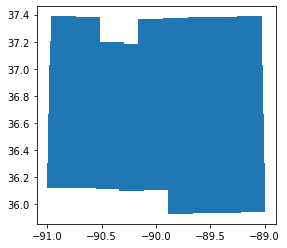

In [15]:
sar_hand_df.plot()

In [34]:
sar_hand_df.head()

,id_sar,geometry,bbox_sar,index_hand,assets_hand,assets_sar
16SBE_2_0,16SBE_2_0,"POLYGON ((-89.88777 35.92968, -89.65933 35.929...","[35.92967653652041, -89.88777486023257, 36.115...",080102,{'hand': {'href': 'https://hand-data.s3.amazon...,{'MASK': {'href': 's3://glofimr-sar-4326/1/654...
16SBE_3_0,16SBE_3_0,"POLYGON ((-89.66537 35.93478, -89.43730 35.934...","[35.93478367384436, -89.6653685720881, 36.1199...",080102,{'hand': {'href': 'https://hand-data.s3.amazon...,{'MASK': {'href': 's3://glofimr-sar-4326/1/654...
16SBE_4_0,16SBE_4_0,"POLYGON ((-89.44291 35.93948, -89.21532 35.939...","[35.939480503976746, -89.44290800279175, 36.12...",080102,{'hand': {'href': 'https://hand-data.s3.amazon...,{'MASK': {'href': 's3://glofimr-sar-4326/1/654...
16SBF_3_3,16SBF_3_3,"POLYGON ((-89.67763 36.29414, -89.44849 36.294...","[36.29413993267378, -89.67762876062712, 36.479...",080102,{'hand': {'href': 'https://hand-data.s3.amazon...,{'MASK': {'href': 's3://glofimr-sar-4326/1/654...
16SBF_3_4,16SBF_3_4,"POLYGON ((-89.67144 36.11361, -89.44284 36.113...","[36.113605600318415, -89.67144387045697, 36.29...",080102,{'hand': {'href': 'https://hand-data.s3.amazon...,{'MASK': {'href': 's3://glofimr-sar-4326/1/654...
